In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression, LinearRegression
from scipy.stats import boxcox

sns.set()
pd.options.display.float_format = '{:,.3f}'.format

# **Separate categorical and numerical columns**

* คือข้อมูลจริงๆเนี่ย dtypes มันไม่ได้สวยงาม บางทีตัวเลขมาเป็น object ก็เลยใช้วิธีด้านล่างนี้ดีกว่ามานั่งดูทีละตัวแปร

In [ ]:
telco_raw = pd.read_csv('telco.csv')
display(telco_raw.head())
display(telco_raw.dtypes)
print("\n")
telco_raw['TotalCharges'].head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

Separate categorical and numeric column names as lists

In [ ]:
custid, target = ['customerID'], ['Churn']

categorical = telco_raw.nunique()[telco_raw.nunique()<10].keys().tolist()
categorical.remove(target[0])

numerical = [col for col in telco_raw.columns if col not in custid+target+categorical]
print(f'numerical columns are {numerical} and \ncategorical columns are {categorical}')

numerical columns are ['tenure', 'MonthlyCharges', 'TotalCharges'] and 
categorical columns are ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
telco_raw[['tenure', 'MonthlyCharges', 'TotalCharges']].dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

จะเห็นว่าตัวแปร `TotalCharges`  มีปัญหา

# **One-hot encoding categorical variables**

In [ ]:
telco_raw = pd.get_dummies(data=telco_raw, columns=categorical, drop_first=True) 
telco_raw.head() 

customerID  tenure  MonthlyCharges TotalCharges Churn  gender_Male  \
0  7590-VHVEG       1           29.85        29.85    No            0   
1  5575-GNVDE      34           56.95       1889.5    No            1   
2  3668-QPYBK       2           53.85       108.15   Yes            1   
3  7795-CFOCW      45           42.30      1840.75    No            1   
4  9237-HQITU       2           70.70       151.65   Yes            0   

   SeniorCitizen_1  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0                0            1               0                 0  ...   
1                0            0               0                 1  ...   
2                0            0               0                 1  ...   
3                0            0               0                 0  ...   
4                0            0               0                 1  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 32 columns]

# **Scaling numerical features**

In [ ]:
from sklearn.preprocessing import StandardScaler

telco_raw['TotalCharges'] = telco_raw['TotalCharges'].astype(float)

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(telco_raw[numerical])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)
scaled_numerical.head()

ValueError: ignored

ต้องมาเปลี่ยนค่าทีหายไป ตัดออก ก่อน

In [ ]:
telco_raw['TotalCharges'].replace(' ', np.nan, inplace=True)

In [ ]:
telco_raw.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

telco_raw['TotalCharges'] = telco_raw['TotalCharges'].astype(float)

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(telco_raw[numerical])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)
scaled_numerical.head()

tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

# **Merging scaled data**

In [ ]:
# Drop non-scaled numerical columns
telco_raw = telco_raw.drop(columns=numerical, axis=1)

# Merge the non-numerical with the scaled numerical data
telco = telco_raw.merge(right=scaled_numerical, 
                        how='left', left_index=True, right_index=True) 
telco.head() 

customerID Churn  gender_Male  SeniorCitizen_1  Partner_Yes  \
0  7590-VHVEG    No            0                0            1   
1  5575-GNVDE    No            1                0            0   
2  3668-QPYBK   Yes            1                0            0   
3  7795-CFOCW    No            1                0            0   
4  9237-HQITU   Yes            0                0            0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0               0                 0                               1   
1               0                 1                               0   
2               0                 1                               0   
3               0                 0                               1   
4               0                 1                               0   

   MultipleLines_Yes  InternetService_Fiber optic  ...  StreamingMovies_Yes  \
0                  0                            0  ...                    0   
1                  0                            0  ...                    0   
2                  0                            0  ...                    0   
3                  0                            0  ...                    0   
4                  0                            1  ...                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check    tenure  MonthlyCharges  TotalCharges  
0                           0 -1.280248       -1.161694     -0.994194  
1                           1  0.064303       -0.260878     -0.173740  
2                           1 -1.239504       -0.363923     -0.959649  
3                           0  0.512486       -0.747850     -0.195248  
4                           0 -1.239504        0.196178     -0.940457  

[5 rows x 32 columns]

# **Supervised learning with code**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 2. Initialize the model
mytree = DecisionTreeClassifier()

# 3. Fit the model on the training data
treemodel = mytree.fit(X_train, y_train)

# 4. Predict values on the testing data
y_pred = treemodel.predict(X_test)

# 5. Measure model performance on testing data
accuracy_score(y_test, y_pred)

# **Unsupervised learning steps**

In [ ]:
from sklearn.cluster import KMeans

# 1. Initialize the model
kmeans = KMeans(n_clusters=3) # พล็อตกราฟ หรือไม่ก็ลองผิดลองถูก

# Fit the model
kmeans.fit(data)

# 3. Asign cluster values
data.assign(Cluster=kmeans.labels_)

# 4. Explore results
data.groupby('Cluster').mean()

### ***Split data to training and testing***

You are now ready to build an end-to-end machine learning model by following a few simple steps! You will explore modeling nuances in much more detail in the next chapters, but for now you will practice and understand the key steps.

The independent features have been loaded for you as a pandas DataFrame named `X`, and the dependent values as a pandas Series named `y`.

Also, the **`train_test_split`** function has been loaded from the **`sklearn`** library. You will now create training and testing datasets, and then make sure the data was correctly split.

* Split `X` and `y` into train and test sets with 25% of the data split into testing.
* Ensure that the training dataset has only 75% of original data.
* Ensure that the testing dataset has only 25% of original data.

In [ ]:
telco_raw = pd.read_csv('telco.csv')
custid, target = ['customerID'], ['Churn']

categorical = telco_raw.nunique()[telco_raw.nunique()<10].keys().tolist()
categorical.remove(target[0])

numerical = [col for col in telco_raw.columns if col not in custid+target+categorical]

telco_raw = pd.get_dummies(data=telco_raw, columns=categorical, drop_first=True) 
telco_raw['TotalCharges'].replace(' ', np.nan, inplace=True)
telco_raw.dropna(inplace=True)

telco_raw['TotalCharges'] = telco_raw['TotalCharges'].astype(float)

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(telco_raw[numerical])
scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical)

telco_raw = telco_raw.drop(columns=numerical, axis=1)
telco = telco_raw.merge(right=scaled_numerical, 
                        how='left', left_index=True, right_index=True) 
telco = pd.get_dummies(telco, columns=['Churn'], drop_first=True)
telco.drop(columns='customerID', inplace=True)
telco.dropna(inplace=True)
X, Y = telco.drop(columns='Churn_Yes'), telco['Churn_Yes']

In [ ]:
# Split X and Y into training and testing datasets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25)

# Ensure training dataset has only 75% of original X data
print(train_X.shape[0] / X.shape[0])

# Ensure testing dataset has only 25% of original X data
print(test_X.shape[0] /X.shape[0])

0.749893177610027
0.25010682238997295




```
<script.py> output:
    0.7499051952976867
    0.2500948047023132
```

### ***Fit a decision tree***
Now, you will take a stab at building a decision tree model. The decision tree is a list of machine-learned if-else rules that decide in the telecom churn case, whether customers will churn or not. Here's an example decision tree graph built on the famous [Titanic](https://www.kaggle.com/c/titanic/data) survival dataset.

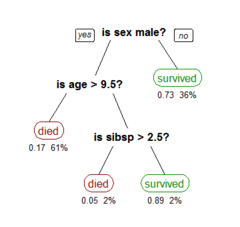

The `train_X`, `test_X`, `train_Y`, `test_Y` from the previous exercise have been loaded for you. Also, the **`tree`** module and the **`accuracy_score`** function have been loaded from the **`sklearn`** library. You will now build your model and check its performance on unseen data.

* Initialize the decision tree model with **`max_depth=5`**.
* Fit the model on the training data, first `train_X`, then `train_Y`.
* Predict values of the testing data, or in this case `test_X`.
* Measure your model's performance on the testing data by comparing between your actual test labels and predicted ones.



In [ ]:
# Initialize the model with max_depth set at 5
mytree = tree.DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
treemodel = mytree.fit(train_X, train_Y)

# Predict values on the testing data
pred_Y = treemodel.predict(test_X)

# Measure model performance on testing data
accuracy_score(test_Y, pred_Y)

0.7881548974943052

You have just built a decision tree predicting churn with 77.7% accuracy!

### ***Predict churn with decision tree***

Now you will build on the skills you acquired in the earlier exercise, and build a more complex decision tree with additional parameters to predict customer churn. You will dive deep into the churn prediction problem in the next chapter. Here you will run the decision tree classifier again on your training data, predict the churn rate on unseen (test) data, and assess model accuracy on both datasets.

The **`tree`** module from the **`sklearn`** library has been loaded for you, as well as the **`accuracy_score`** function from **`sklearn.metrics`**. The features and target variables have also been imported as `train_X`, `train_Y` for training data, and `test_X`, `test_Y` for test data.

* Initialize a Decision tree with maximum depth set to 7 and by using the **`gini`** criterion.
* Fit the model to the training data.
* Predict the values on the test dataset.
* Print the accuracy values for both training and test datasets.

In [ ]:
# Initialize the Decision Tree
clf = tree.DecisionTreeClassifier(max_depth=7, 
               criterion='gini', 
               splitter='best')

# Fit the model to the training data
clf = clf.fit(train_X, train_Y)

# Predict the values on test dataset
pred_Y = clf.predict(test_X)

# Print accuracy values
print("Training accuracy: ", np.round(clf.score(train_X, train_Y), 3)) 
print("Test accuracy: ", np.round(accuracy_score(test_Y, pred_Y), 3))

Training accuracy:  0.791
Test accuracy:  0.783




```
<script.py> output:
    Training accuracy:  0.82
    Test accuracy:  0.78
```

With no parameter tuning you are accurate in around 3/4 of the cases.

# **Exploring churn distribution**



In [ ]:
telco.rename(columns={'Churn_Yes':"Churn"}, inplace=True)
telco.groupby(['Churn']).size() / telco.shape[0] * 100

Churn
0    73.422589
1    26.577411
dtype: float64

### ใช้ **`value_counts`** ก็ได้

In [ ]:
telco['Churn'].value_counts(normalize=True)*100

0    73.422589
1    26.577411
Name: Churn, dtype: float64

### มีปัญหา class imbalance ซึ่งมักจะไม่ทำอะไร ถ้าค่าตัวอย่างกลุ่มที่ต่ำกว่าไม่น้อยกว่า 5% (ใช้ SMOTE)

### ***Explore churn rate and split data***

Explore the churn distribution and split the data into training and testing before you proceed to modeling. In this step you get to understand how the churn rate is distributed, and pre-process the data so you can build a model on the training set, and measure its performance on unused testing data.

The telecom dataset has been loaded as a pandas DataFrame named `telcom`. The target variable column is called `Churn`.

* Print the unique values in the `Churn` column.
* Calculate the ratio size of each churn group.
* Import the function for splitting data to train and test.
* Split the data into 75% train and 25% test.

In [ ]:
telcom = telco.copy()

# Print the unique Churn values
print(set(telcom['Churn']))

# Calculate the ratio size of each churn group
telcom.groupby(['Churn']).size() / telcom.shape[0] * 100

# Import the function for splitting data to train and test
from sklearn.model_selection import train_test_split

# Split the data into train and test
train, test = train_test_split(telcom, test_size = .25)

{0, 1}


# **Predict churn with logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=9999)
logreg.fit(train_X, train_Y)

pred_train_Y = logreg.predict(train_X)
pred_test_Y = logreg.predict(test_X)
train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)

print('Training accuracy:', round(train_accuracy,4))
print('Test accuracy:', round(test_accuracy, 4))

Training accuracy: 0.7903
Test accuracy: 0.7876


# **Measuring precision and recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score

train_precision = round(precision_score(train_Y, pred_train_Y), 4)
test_precision = round(precision_score(test_Y, pred_test_Y), 4)
train_recall = round(recall_score(train_Y, pred_train_Y), 4)
test_recall = round(recall_score(test_Y, pred_test_Y), 4)

print('Training precision: {}, Training recall: {}'.format(train_precision, train_recall))
print('Test precision: {}, Test recall: {}'.format(train_recall, test_recall))

Training precision: 0.6315, Training recall: 0.5317
Test precision: 0.5317, Test recall: 0.5089


# **L1 regularization (Lasso) and feature selection**

* **`C`** parameter needs to be **tuned** to find the optimal value

In [ ]:
pd.options.display.float_format = '{:,.3f}'.format
C = [1, .5, .25, .1, .05, .025, .01, .005, .0025]
l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C

for index in range(0, len(C)):
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear')
    logreg.fit(train_X, train_Y)
    pred_test_Y = logreg.predict(test_X)
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = accuracy_score(test_Y, pred_test_Y)
    l1_metrics[index,3] = precision_score(test_Y, pred_test_Y)
    l1_metrics[index,4] = recall_score(test_Y, pred_test_Y)

col_names = ['C','Non-Zero Coeffs','Accuracy','Precision','Recall']
pd.DataFrame(l1_metrics, columns=col_names)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C  Non-Zero Coeffs  Accuracy  Precision  Recall
0 1.000           28.000     0.789      0.600   0.516
1 0.500           27.000     0.788      0.599   0.511
2 0.250           23.000     0.789      0.603   0.504
3 0.100           21.000     0.793      0.618   0.496
4 0.050           23.000     0.789      0.611   0.478
5 0.025           17.000     0.785      0.610   0.433
6 0.010            9.000     0.770      0.734   0.154
7 0.005           12.000     0.745      0.000   0.000
8 0.003            0.000     0.745      0.000   0.000

# **Fit logistic regression model**

Logistic regression is a simple yet very powerful classification model that is used in many different use cases. You will now fit a logistic regression on the training part of the telecom churn dataset, and then predict labels on the unseen test set. Afterwards, you will calculate the accuracy of your model predictions.

The **`accuracy_score`** function has been imported, and a **`LogisticRegression`** instance from **`sklearn`** has been initialized as `logreg`. The training and testing datasets that you've built previously have been loaded as `train_X` and `test_X` for features, and `train_Y` and `test_Y` for target variables.

* Fit a logistic regression on the training data.
* Predict churn labels for the test data.
* Calculate the accuracy score on the testing data.
* Print the test accuracy rounded to 4 decimals.

In [ ]:
logreg = LogisticRegression(max_iter=9999)

# Fit logistic regression on training data
logreg.fit(train_X, train_Y)

# Predict churn labels on testing data
pred_test_Y = logreg.predict(test_X)

# Calculate accuracy score on testing data
test_accuracy = accuracy_score(test_Y, pred_test_Y)

# Print test accuracy score rounded to 4 decimals
print('Test accuracy:', round(test_accuracy, 4))

Test accuracy: 0.7876


### ***Fit logistic regression with L1 regularization***

You will now run a logistic regression model on scaled data with L1 regularization to perform feature selection alongside model building. In the video exercise you have seen how the different C values have an effect on your accuracy score and the number of non-zero features. In this exercise, you will set the **`C`** value to 0.025.


* Initialize a logistic regression with L1 regularization and **`C`** value of 0.025.
* Fit the model on the training data.
* Predict churn values on the test data.
* Print the accuracy score of your predicted labels on the test data.

In [ ]:
# Initialize logistic regression instance 
logreg = LogisticRegression(penalty='l1', C=0.025, solver='liblinear', max_iter=9999)

# Fit the model on training data
logreg.fit(train_X, train_Y)

# Predict churn values on test data
pred_test_Y = logreg.predict(test_X)

# Print the accuracy score on test data
print('Test accuracy:', round(accuracy_score(test_Y, pred_test_Y), 4))

Test accuracy: 0.7847


### ***Identify optimal L1 penalty coefficient***

You will now tune the **`C`** parameter for the L1 regularization to discover the one which reduces model complexity while still maintaining good model performance metrics. You will run a for loop through possible **`C`** values and build logistic regression instances on each, as well as calculate performance metrics.

* Run a **`for`** loop over the range from 0 to the length of the list **`C`**.
* For each **`C`** candidate, initialize and fit a Logistic Regression and predict churn on test data.
* For each **`C`** candidate, store the non-zero coefficients and the recall score in the second and third columns of `l1_metrics`.
* Create a pandas DataFrame out of `l1_metrics` with the appropriate column names.

In [ ]:
C = [1, 0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025]
l1_metrics = np.zeros((len(C), 3))
l1_metrics[:,0] = C

# Run a for loop over the range of C list length
for index in range(0, len(C)):
    # Initialize and fit Logistic Regression with the C candidate
    logreg = LogisticRegression(penalty='l1', C=C[index], solver='liblinear', max_iter=9999)
    logreg.fit(train_X, train_Y)
    # Predict churn on the testing data
    pred_test_Y = logreg.predict(test_X)
    # Create non-zero count and recall score columns
    l1_metrics[index,1] = np.count_nonzero(logreg.coef_)
    l1_metrics[index,2] = recall_score(test_Y, pred_test_Y)

# Name the columns and print the array as pandas DataFrame
col_names = ['C','Non-Zero Coeffs','Recall']
pd.DataFrame(l1_metrics, columns=col_names)

C  Non-Zero Coeffs  Recall
0 1.000           23.000   0.516
1 0.500           28.000   0.511
2 0.250           23.000   0.504
3 0.100           24.000   0.496
4 0.050           22.000   0.478
5 0.025           12.000   0.433
6 0.010           12.000   0.154
7 0.005            6.000   0.000
8 0.003            0.000   0.000

You can now explore the C values and associated count of non-zero coefficients and the recall score to decide which parameter value to choose.

# **Predict churn with decision trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

mytree = DecisionTreeClassifier()
treemodel = mytree.fit(train_X, train_Y)

pred_train_Y = mytree.predict(train_X)
pred_test_Y = mytree.predict(test_X)
train_accuracy = accuracy_score(train_Y, pred_train_Y)
test_accuracy = accuracy_score(test_Y, pred_test_Y)
print('Training accuracy:', round(train_accuracy,4))
print('Test accuracy:', round(test_accuracy, 4))

Training accuracy: 0.9998
Test accuracy: 0.7005


# **Measuring precision and recall of Decision Tree Classifier**

In [ ]:
from sklearn.metrics import precision_score, recall_score

train_precision = round(precision_score(train_Y, pred_train_Y), 4)
test_precision = round(precision_score(test_Y, pred_test_Y), 4)
train_recall = round(recall_score(train_Y, pred_train_Y), 4)
test_recall = round(recall_score(test_Y, pred_test_Y), 4)

print('Training precision: {}, Training recall: {}'.format(train_precision, train_recall))
print('Test precision: {}, Test recall: {}'.format(train_recall, test_recall))

Training precision: 1.0, Training recall: 0.9993
Test precision: 0.9993, Test recall: 0.4598


# **Tree depth parameter tuning**

In [ ]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list), 4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    mytree = DecisionTreeClassifier(max_depth=depth_list[index])
    mytree.fit(train_X, train_Y)
    pred_test_Y = mytree.predict(test_X)
    depth_tuning[index,1] = accuracy_score(test_Y, pred_test_Y)
    depth_tuning[index,2] = precision_score(test_Y, pred_test_Y)
    depth_tuning[index,3] = recall_score(test_Y, pred_test_Y)

col_names = ['Max_Depth','Accuracy','Precision','Recall']
pd.DataFrame(depth_tuning, columns=col_names)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Max_Depth  Accuracy  Precision  Recall
0       2.000     0.745      0.000   0.000
1       3.000     0.756      0.521   0.516
2       4.000     0.776      0.586   0.417
3       5.000     0.778      0.610   0.364
4       6.000     0.756      0.523   0.518
5       7.000     0.759      0.531   0.482
6       8.000     0.765      0.545   0.469
7       9.000     0.758      0.531   0.442
8      10.000     0.742      0.494   0.451
9      11.000     0.744      0.497   0.444
10     12.000     0.739      0.487   0.455
11     13.000     0.732      0.476   0.482
12     14.000     0.723      0.459   0.482

# **Plotting decision tree rules**

In [ ]:
from sklearn import tree
import graphviz
exported = tree.export_graphviz(decision_tree=mytree, out_file=None, 
                                feature_names=X.columns,
                                precision=1,
                                class_names=['Not churn','Churn'],
                                filled = True, rounded=True)

graph = graphviz.Source(exported)
display(graph)

In [ ]:
X.columns

Index(['gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

# **Logistic regression coefficients**

$$\log\frac{p}{1-p} = \beta_0 + \beta_1x_1 + \beta_2x_2$$

# **Extracting logistic regression coefficients**

In [ ]:
logreg.coef_

array([[-0.06096751,  0.06559666, -0.16226185, -0.15754786, -0.18408601,
         0.18205767, -0.04501398,  0.81766428, -0.13870308, -0.13870308,
        -0.46259981, -0.13870308, -0.41044591, -0.13870308, -0.13475068,
        -0.13870308, -0.32391157, -0.13870308,  0.1262309 , -0.13870308,
         0.12830723, -1.20366854, -2.21501045,  0.32287092, -0.02307675,
         0.53130954,  0.28902466, -0.01462828,  0.05357592, -0.05111758]])

# **Transforming logistic regression coefficients**

* Log-odds is difficult to interpret
* Solution - calculate exponent of the coe)cients

In [ ]:
coefficients = pd.concat([pd.DataFrame(train_X.columns),
                          pd.DataFrame(np.transpose(logreg.coef_))],
                          axis=1)
coefficients.columns = ['Feature', 'Coefficient']
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])
coefficients = coefficients[coefficients['Coefficient']!=0]
coefficients.sort_values(by=['Coefficient'])

Feature  Coefficient  Exp_Coefficient
22                      Contract_Two year       -2.215            0.109
21                      Contract_One year       -1.204            0.300
10                     OnlineSecurity_Yes       -0.463            0.630
12                       OnlineBackup_Yes       -0.410            0.663
16                        TechSupport_Yes       -0.324            0.723
4                        PhoneService_Yes       -0.184            0.832
2                             Partner_Yes       -0.162            0.850
3                          Dependents_Yes       -0.158            0.854
19    StreamingMovies_No internet service       -0.139            0.870
17        StreamingTV_No internet service       -0.139            0.870
8                      InternetService_No       -0.139            0.870
9      OnlineSecurity_No internet service       -0.139            0.870
11       OnlineBackup_No internet service       -0.139            0.870
15        TechSupport_No internet service       -0.139            0.870
13   DeviceProtection_No internet service       -0.139            0.870
14                   DeviceProtection_Yes       -0.135            0.874
0                             gender_Male       -0.061            0.941
29                           TotalCharges       -0.051            0.950
6                       MultipleLines_Yes       -0.045            0.956
24  PaymentMethod_Credit card (automatic)       -0.023            0.977
27                                 tenure       -0.015            0.985
28                         MonthlyCharges        0.054            1.055
1                         SeniorCitizen_1        0.066            1.068
18                        StreamingTV_Yes        0.126            1.135
20                    StreamingMovies_Yes        0.128            1.137
5          MultipleLines_No phone service        0.182            1.200
26             PaymentMethod_Mailed check        0.289            1.335
23                   PaperlessBilling_Yes        0.323            1.381
25         PaymentMethod_Electronic check        0.531            1.701
7             InternetService_Fiber optic        0.818            2.265

### ***Explore logistic regression coefficients***

You will now explore the coefficients of the logistic regression to understand what is driving churn to go up or down. For this exercise, you will extract the logistic regression coefficients from your fitted model, and calculate their exponent to make them more interpretable.

* Combine feature names and coefficients into a pandas DataFrame.
* Calculate the exponent of the logistic regression coefficients.
* Remove the coefficients that are equal to zero and print them sorted by the exponent coefficient.

In [ ]:
# Combine feature names and coefficients into pandas DataFrame
feature_names = pd.DataFrame(train_X.columns, columns=['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns= ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# Calculate exponent of the logistic regression coefficients
coefficients['Exp_Coefficient'] = np.exp(coefficients['Coefficient'])

# Remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient']!=0]

# Print the values sorted by the exponent coefficient
print(coefficients.sort_values(by=['Exp_Coefficient']))

                                  Feature  Coefficient  Exp_Coefficient
22                      Contract_Two year       -2.215            0.109
21                      Contract_One year       -1.204            0.300
10                     OnlineSecurity_Yes       -0.463            0.630
12                       OnlineBackup_Yes       -0.410            0.663
16                        TechSupport_Yes       -0.324            0.723
4                        PhoneService_Yes       -0.184            0.832
2                             Partner_Yes       -0.162            0.850
3                          Dependents_Yes       -0.158            0.854
19    StreamingMovies_No internet service       -0.139            0.870
17        StreamingTV_No internet service       -0.139            0.870
8                      InternetService_No       -0.139            0.870
9      OnlineSecurity_No internet service       -0.139            0.870
11       OnlineBackup_No internet service       -0.139          

### ***Break down decision tree rules***

In this exercise you will extract the if-else rules from the decision tree and plot them to identify the main drivers of the churn.


*Note that we've used a proprietary `display_image()` function instead of `display(graph)` to make it easier for you to view the output.*

* Assign the feature names.
* Set the precision to 1 and add the class names.
* Call the **`Source()`** function from **`graphviz`** and pass the exported **`graphviz`** object.

In [ ]:
def display_image(p):
    HtmlManager.getPlots().append(FigHtml([p]))

# Export graphviz object from the trained decision tree 
exported = tree.export_graphviz(decision_tree=mytree, 
			# Assign feature names
            out_file=None, feature_names=train_X.columns, 
			# Set precision to 1 and add class names
			precision=1, class_names=['Not churn','Churn'], filled=True)

# Call the Source function and pass the exported graphviz object
graph = graphviz.Source(exported)

# Display the decision tree
display_image(graph)

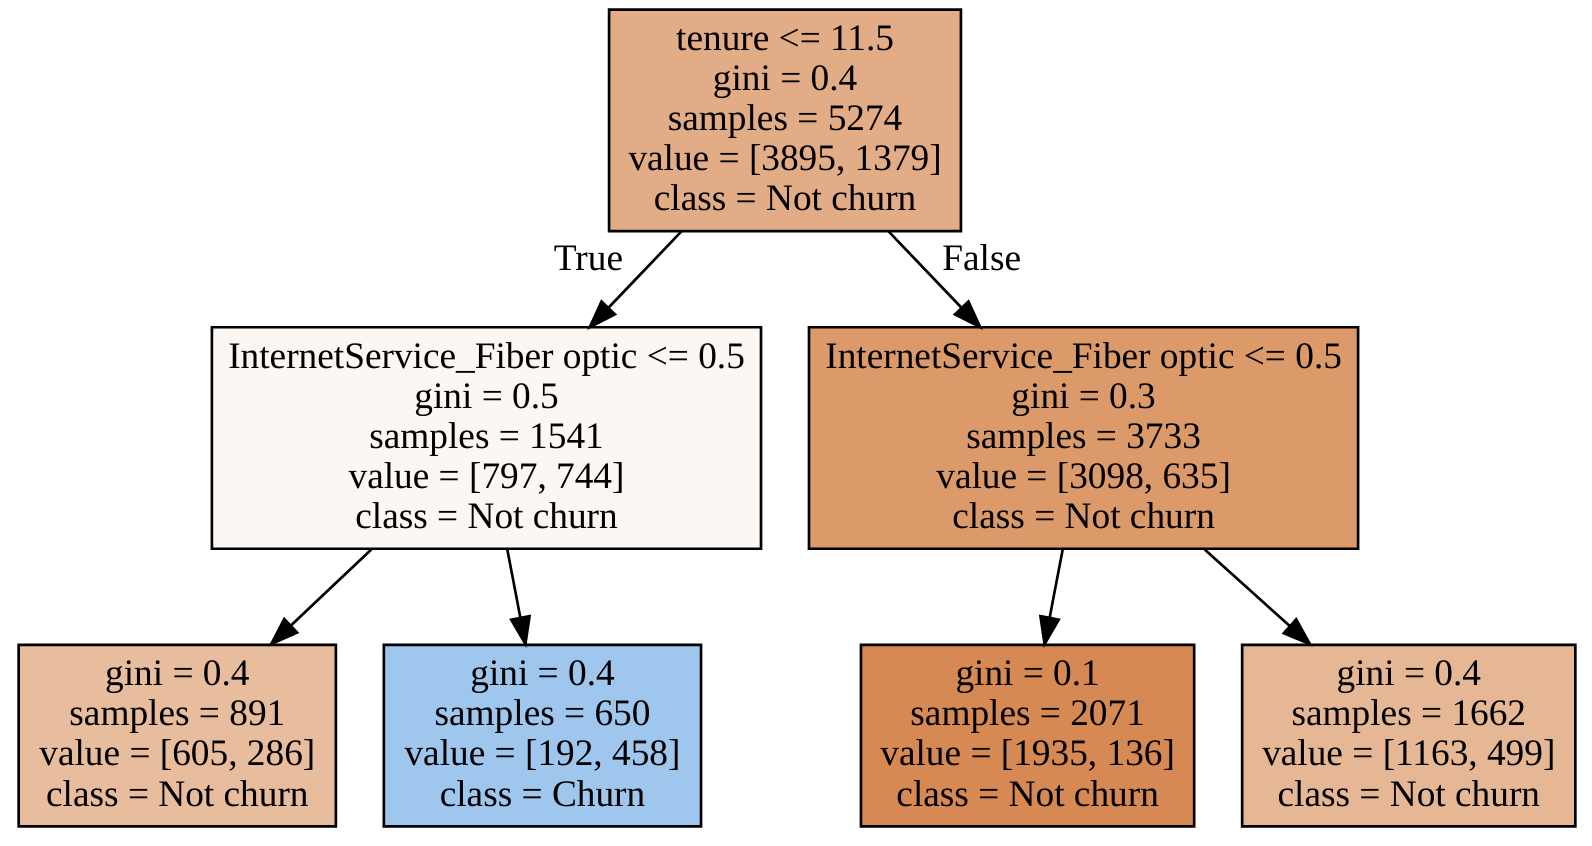

# **Customer Lifetime Value (CLV)**

## **Traditional CLV formula**

$$CLV = \text{Average Revenue} \times \text{Profit Margin} \times \frac{\text{Retention Rate}}{1 - \text{Retention Rate}}$$


$$\text{Churn Rate} = 1 - \text{Retention Rate}$$

### ***Build retention and churn tables***

You have learned the main elements of the customer lifetime value calculation and certain variations of it. Now you will use use the monthly cohort activity dataset to calculate retention and churn values, which you will then explore and later use to project average customer lifetime value.

The pandas library has been loaded as pd and the `cohorts_counts` dataset has been imported. Feel free to explore it in the console.

* Extract cohort sizes from the first column of `cohort_counts`.
* Calculate retention by dividing the cohort counts with the cohort sizes.
* Calculate churn by subtracting 1 and the retention rates.
* Print the retention table.

In [ ]:
cohort_counts = pd.read_csv('cohorts.csv', index_col='AcquisitionMonth', parse_dates=['AcquisitionMonth'])

# Extract cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]

# Calculate retention by dividing the counts with the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Calculate churn
churn = 1 - retention

# Print the retention table
retention

1     2     3     4     5     6     7     8     9    10  \
AcquisitionMonth                                                               
2010-12-01       1.000 0.344 0.309 0.351 0.342 0.398 0.348 0.330 0.335 0.370   
2011-01-01       1.000 0.208 0.247 0.244 0.331 0.271 0.247 0.259 0.313 0.307   
2011-02-01       1.000 0.184 0.180 0.263 0.269 0.234 0.253 0.263 0.272 0.301   
2011-03-01       1.000 0.162 0.258 0.196 0.214 0.173 0.253 0.219 0.276 0.098   
2011-04-01       1.000 0.192 0.204 0.192 0.184 0.204 0.220 0.231 0.067   NaN   
2011-05-01       1.000 0.161 0.173 0.145 0.209 0.233 0.245 0.088   NaN   NaN   
2011-06-01       1.000 0.159 0.126 0.198 0.237 0.300 0.092   NaN   NaN   NaN   
2011-07-01       1.000 0.162 0.179 0.220 0.254 0.098   NaN   NaN   NaN   NaN   
2011-08-01       1.000 0.216 0.201 0.252 0.101   NaN   NaN   NaN   NaN   NaN   
2011-09-01       1.000 0.201 0.280 0.122   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01       1.000 0.211 0.094   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01       1.000 0.110   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01       1.000   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                    11    12    13  
AcquisitionMonth                    
2010-12-01       0.355 0.486 0.240  
2011-01-01       0.373 0.136   NaN  
2011-02-01       0.089   NaN   NaN  
2011-03-01         NaN   NaN   NaN  
2011-04-01         NaN   NaN   NaN  
2011-05-01         NaN   NaN   NaN  
2011-06-01         NaN   NaN   NaN  
2011-07-01         NaN   NaN   NaN  
2011-08-01         NaN   NaN   NaN  
2011-09-01         NaN   NaN   NaN  
2011-10-01         NaN   NaN   NaN  
2011-11-01         NaN   NaN   NaN  
2011-12-01         NaN   NaN   NaN

### ***Explore retention and churn***

Now that you have calculated the monthly retention and churn metrics for monthly customer cohorts, you can calculate the overall mean retention and churn rates. You will use the **`.mean()`** method twice in a row (this is called "chaining") to calculate the overall mean. You will have to exclude the first month values (first column) from this calculation as they are constant given this is the first month the customers have been active therefore their retention will be 100% and churn will be 0% for all cohorts.

The pandas and numpy libraries have been loaded as pd as np respectively. The `retention` and `churn` monthly datasets that you built in the previous exercises are also imported.

* Calculate the mean retention rate.
* Calculate the mean churn rate.
* Print rounded retention and churn rates.

In [ ]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


Exploring these rates is critical in customer lifetime value calculation as it gives you insight into the customer behavior.

# **Calculating and projecting CLV**



```
        InvoiceNo StockCode                      Description  Quantity         InvoiceDate  UnitPrice  CustomerID         Country  TotalSum InvoiceMonth
416792     572558     22745       POPPY'S PLAYHOUSE BEDROOM          6 2011-10-25 08:26:00       2.10     14286.0  United Kingdom     12.60      2011-10
482904     577485     23196    VINTAGE LEAF MAGNETIC NOTEPAD         1 2011-11-20 11:56:00       1.45     16360.0  United Kingdom      1.45      2011-11
263743     560034     23299     FOOD COVER WITH BEADS SET 2          6 2011-07-14 13:35:00       3.75     13933.0  United Kingdom     22.50      2011-07
495549     578307    72349B  SET/6 PURPLE BUTTERFLY T-LIGHTS         1 2011-11-23 15:53:00       2.10     17290.0  United Kingdom      2.10      2011-11
204384     554656     21756         BATH BUILDING BLOCK WORD         3 2011-05-25 13:36:00       5.95     17663.0  United Kingdom     17.85      2011-05
```



## **Revenue Based CLV**

$$CLV = \text{Average Revenue}  \times \frac{\text{Retention Rate}}{1 - \text{Retention Rate}}$$

## **Basic CLV calculation**

In [ ]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()

# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)

# Define lifespan to 36 months
lifespan_months = 36

# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months

# Print basic CLV value
print('Average basic CLV is {:.1f} USD'.format(clv_basic))



```
Average basic CLV is 4774.6 USD
```



## **Granular CLV calculation**



In [ ]:
# Calculate average revenue per invoice
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

# Calculate average number of unique invoices per customer per month
freq = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()

# Define lifespan to 36 months
lifespan_months = 36

# Calculate granular CLV
clv_granular = revenue_per_purchase * freq * lifespan_months

# Print granular CLV value
print('Average granular CLV is {:.1f} USD'.format(clv_granular))



```
Average granular CLV is 1635.2 USD
Revenue per purchase: 34.8 USD
Frequency per month: 1.3
```

## **Traditional CLV calculation**

In [ ]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()

# Calculate average monthly retention rate
retention_rate = retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate average monthly churn rate
churn_rate = 1 - retention_rate

# Calculate traditional CLV
clv_traditional = monthly_revenue * (retention_rate / churn_rate)

# Print traditional CLV and the retention rate values
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(clv_traditional, retention_rate*100))



```
Average traditional CLV is 49.9 USD at 27.3 % retention_rate
Monthly average revenue: 132.6 USD
```

# **Recency, frequency, monetary (RFM) features**

* **Recency** - time since last customer transaction
* **Frequency** - number of purchases in the observed period
* **Monetary value** - total amount spent in the observed period

# **Explore the sales distribution by month**

* Predict the number of purchas of future months?
  * Which one is the future month?

In [ ]:
# Explore monthly distribution of observations
online.groupby(['InvoiceMonth']).size()



```
InvoiceMonth
2010-12 4893
2011-01 3580
2011-02 3648
2011-03 4764
2011-04 4148
2011-05 5018
2011-06 4669
2011-07 4610
2011-08 4744
2011-09 7189
2011-10 8808
2011-11 9513
dtype: int64
```



* Use the last date as a period in the target variable

# **Separate feature data**

In [ ]:
# Exclude target variable
online_X = online[online['InvoiceMonth']!='2011-11']

# Define snapshot date
NOW = dt.datetime(2011,11,1)

# Build the features
features = online_X.groupby('CustomerID').agg({
                              'InvoiceDate': lambda x: (NOW - x.max()).days,
                              'InvoiceNo': pd.Series.nunique,
                              'TotalSum': np.sum,
                              'Quantity': ['mean', 'sum']}).reset_index()

features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']

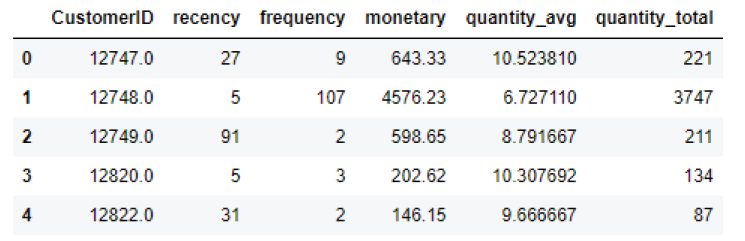

# **Calculate target variable**

In [ ]:
# Build pivot table with monthly transactions per customer
cust_month_tx = pd.pivot_table(data=online, index=['CustomerID'],
                               values='InvoiceNo',
                               columns=['InvoiceMonth'],
                               aggfunc=pd.Series.nunique, fill_value=0)

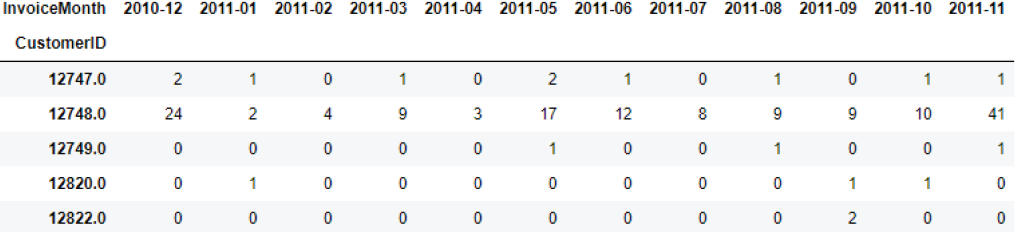

* Use only the last month

# **Finalize data preparation**


In [ ]:
# Store identifier and target variable column names
custid = ['CustomerID']
target = ['2011-11']

# Extract target variable
Y = cust_month_tx[target]

# Extract feature column names
cols = [col for col in features.columns if col not in custid]

# Store features
X = features[cols]

### ***Predict next month transactions***

You are finally in the stage of predicting next month's transaction with linear regression. Here you will use the input features you've previously built, train the model on them and the target variable, and predict the values on the unseen testing data. In the next exercise you will measure the model performance.

`X`



```
      recency  frequency  monetary  quantity_avg  quantity_total
2941        5          2     52.70         2.333              14
1232       36          1     70.14        29.750             119
2460        6          2    156.75         9.800              49
1767      116          1     29.72        20.000              60
1417       26          1    227.52        19.500             156
```
`Y`

```
            2011-11
CustomerID         
17564.0           1
14806.0           0
16762.0           1
15675.0           0
15127.0           0
```




In [ ]:
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

### ***Measure model fit***

Now you will measure the regression performance on both training and testing data with two metrics - root mean squared error and mean absolute error. This is a critical step where you are measuring how "close" are the model predictions compared to actual values.

* Calculate the root mean squared error on the training data by using the **`np.sqrt()`** function.
* Calculate the mean absolute error on the training data.
* Calculate the root mean squared error on the testing data.
* Calculate the mean absolute error on the testing data.

In [ ]:
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))



```
<script.py> output:
    RMSE train: 0.7167503307950375; RMSE test: 1.2156885786624645
    MAE train: 0.5138783671689997, MAE test: 0.5548888276615969
```



### ***Explore model coefficients***

You will now explore the model performance from a different angle, and *only on the training data*. One thing you learned in the latest lesson is that not all model coefficients are statistically significant and we should look at the model summary table to explore their significance. Fortunately, the **`statsmodels`** library provides this functionality. Once you print the model summary table, explore which variables have the p-value lower than 0.05 (i.e. lower than 5%) to make sure the coefficient is significant.


* Initialize a model instance on the training data using the **`OLS()`** function.
* Fit the model.
* Print model summary using the **`.summary()`** method.

In [ ]:
# Import `statsmodels.api` module
import statsmodels.api as sm

# Initialize model instance on the training data
olsreg = sm.OLS(train_Y, train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())



```
<script.py> output:
                                     OLS Regression Results                                
    =======================================================================================
    Dep. Variable:                      y   R-squared (uncentered):                   0.488
    Model:                            OLS   Adj. R-squared (uncentered):              0.487
    Method:                 Least Squares   F-statistic:                              480.3
    Date:                Wed, 22 Jun 2022   Prob (F-statistic):                        0.00
    Time:                        17:39:35   Log-Likelihood:                         -2769.8
    No. Observations:                2529   AIC:                                      5550.
    Df Residuals:                    2524   BIC:                                      5579.
    Df Model:                           5                                                  
    Covariance Type:            nonrobust                                                  
    ==================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
    ----------------------------------------------------------------------------------
    recency            0.0002      0.000      1.701      0.089   -2.92e-05       0.000
    frequency          0.1316      0.003     38.000      0.000       0.125       0.138
    monetary        1.001e-06   3.59e-05      0.028      0.978   -6.95e-05    7.15e-05
    quantity_avg       0.0001      0.000      0.803      0.422      -0.000       0.000
    quantity_total    -0.0001   5.74e-05     -2.562      0.010      -0.000   -3.45e-05
    ==============================================================================
    Omnibus:                      987.494   Durbin-Watson:                   1.978
    Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5536.657
    Skew:                           1.762   Prob(JB):                         0.00
    Kurtosis:                       9.334   Cond. No.                         249.
    ==============================================================================
    
    Notes:
    [1] R² is computed without centering (uncentered) since the model does not contain a constant.
    [2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```



# ***Explore customer product purchase dataset***

Plot some exploratory charts to understand the distribution of the variables and relationships between them. Here, you will explore the `wholesale` dataset and plot the pairwise relationships as well as the estimated distributions for each variable with the **`pairplot`** function from the **`seaborn`** library. It's an important step to ***explore the distribution types***, and the ***relationships between the variables*** to inform the need for further data preprocessing.

* Print the header of the `wholesale` dataset
* Plot the pairwise relationships between the variables
* Display the chart.

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185

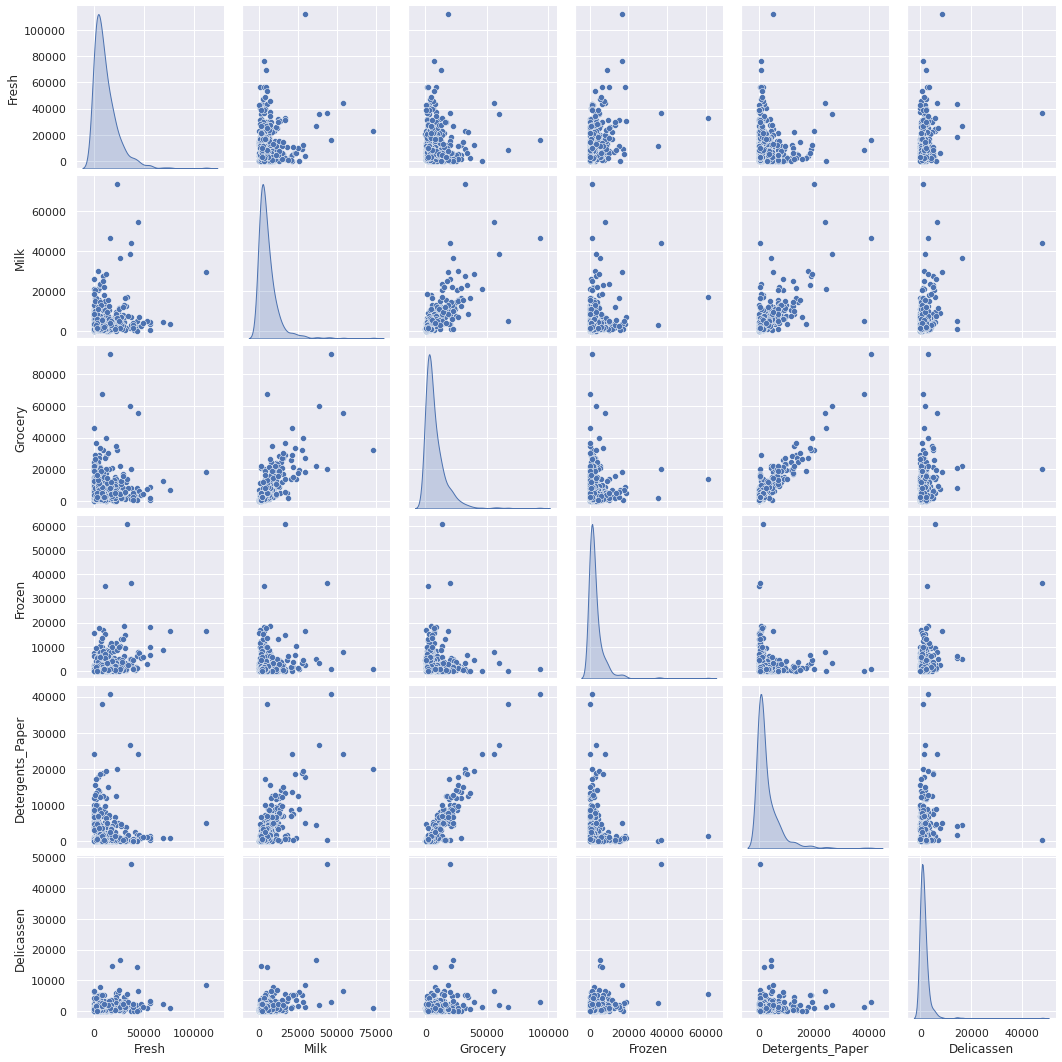

In [ ]:
wholesale = pd.read_csv('wholesale.csv').drop(columns='Unnamed: 0')
display(wholesale.head())

# Plot the pairwise relationships between the variables
sns.pairplot(data=wholesale, diag_kind='kde')
plt.show()

Most variables have non-symmetrical distributions i.e. they are skewed.

# ***Understand differences in variables***

Now, you will analyze the averages and standard deviations of each variable by plotting them in a barplot. This is a complementary step to the one before, as you will visually explore the differences in variable scales and variances.

* Create a list with `wholesale`'s column names and another one with sorted values from `0` to the number of columns in `wholesale`.

* Plot `averages` in grey and `std_devs` in orange, adjust the x-axis by 0.2

* Add `x_ix` as ticks and `x_names` as labels and make sure you rotate them by 90 degrees.
* Add the legend and display the chart.

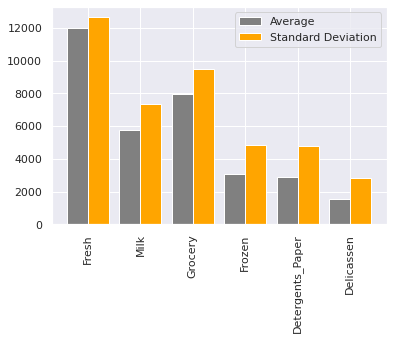

In [ ]:
averages = wholesale.mean()
std_devs = wholesale.std()

# Create column names list and same length integer list
x_names = wholesale.columns
x_ix = np.arange(wholesale.shape[1])

# Plot the averages data in gray and standard deviations in orange 
plt.bar(x=x_ix-0.2, height=averages, color='grey', label='Average', width=0.4)
plt.bar(x=x_ix+0.2, height=std_devs, color='orange', label='Standard Deviation', width=0.4)

# Add x-axis labels and rotate
plt.xticks(ticks=x_ix, labels=x_names, rotation=90)

# Add the legend and display the chart
plt.legend()
plt.show()

This plot gives you a visual sense of the differences in averages and standard deviations.

# **Model assumptions**

* **K-means** clustering works well when data is 
  * 1) ~normally distributed (no skew), and 
  * 2) standardized (mean = 0, standard deviation = 1)

* **NMF** - can be used on raw data, especially if the matrix is sparse.

## **Unskewing data with log-transformation**



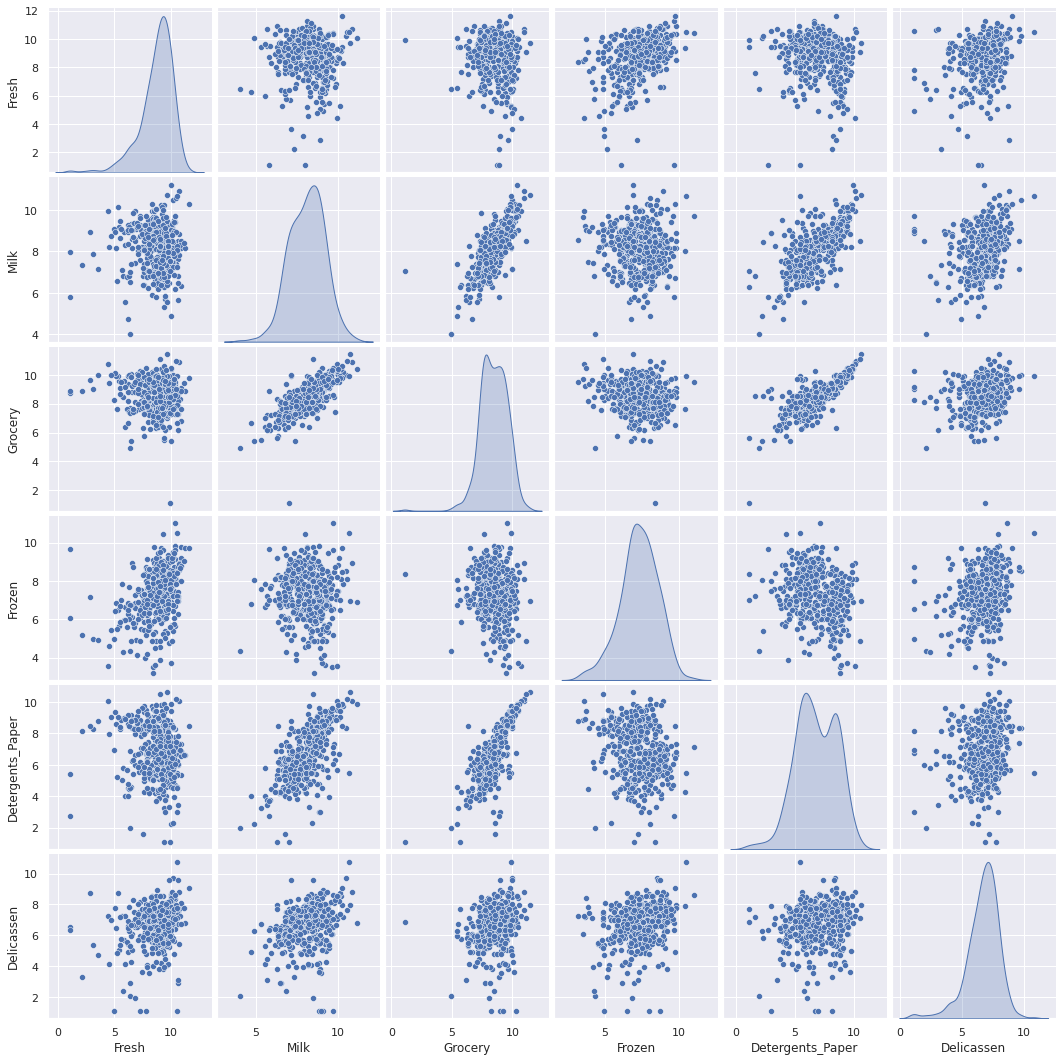

In [ ]:
# First option - log transformation
wholesale_log = np.log(wholesale)
sns.pairplot(data=wholesale_log, diag_kind='kde')
plt.show()

# **Unskewing data with Box-Cox transformation**

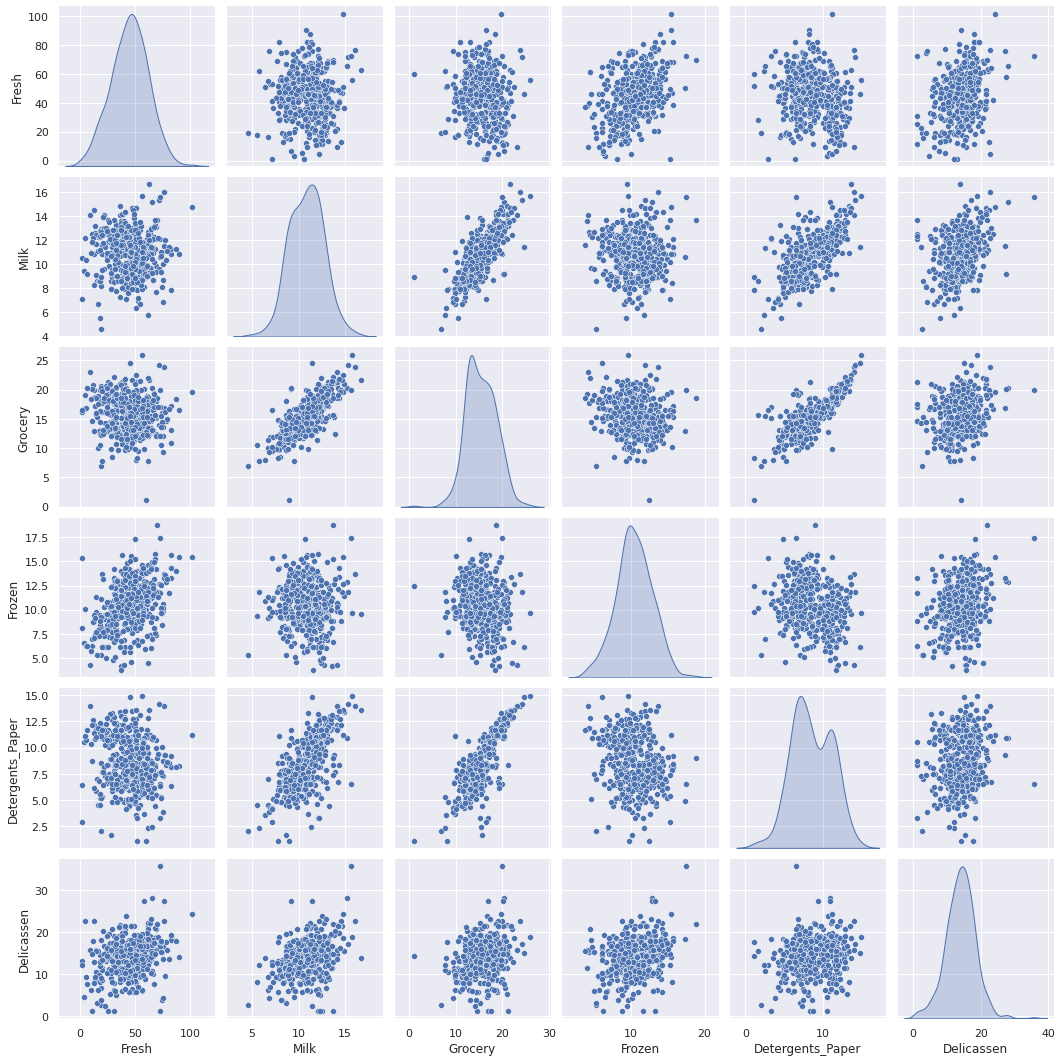

In [ ]:
# Second option - Box-Cox transformation
from scipy.stats import boxcox

def boxcox_df(x):
    x_boxcox, _ = boxcox(x)
    return x_boxcox
    
wholesale_boxcox = wholesale.apply(boxcox_df, axis=0)
sns.pairplot(wholesale_boxcox, diag_kind='kde')
plt.show()

# **Scale the data**

* Subtract column average from each column value
* Divide each column value by column standard deviation
* Will use **`StandardScaler()`** module from **`sklearn`**

In [ ]:
from sklearn.preprocessing import StandardScaler
pd.options.display.float_format = '{:,.1f}'.format

scaler = StandardScaler()
wholesale_scaled = scaler.fit_transform(wholesale_boxcox)
wholesale_scaled_df = pd.DataFrame(data=wholesale_scaled, 
                                   index=wholesale_boxcox.index,
                                   columns=wholesale_boxcox.columns)
wholesale_scaled_df.agg(['mean','std']).round()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
mean   -0.0   0.0     -0.0    -0.0              -0.0         0.0
std     1.0   1.0      1.0     1.0               1.0         1.0

# **Segmentation steps with K-means**

## **สำคัญมาก**: ตอน assign labels ให้ไปใส่ในข้อมูล้นฉบับ ไม่ใช่ใส่ไปในข้อมูลที่ทำ boxcox หรือ StandardScaler มาแล้ว

In [ ]:
from sklearn.cluster import KMeans

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(wholesale_scaled_df)
wholesale_kmeans4 = wholesale.assign(segment=kmeans.labels_)
wholesale_kmeans4.sample(10)

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  segment
288  16260    594     1296     848               445         258        1
183  36847  43950    20170   36534               239       47943        0
224   7274    659     1499     784                70         659        1
276  27901   3749     6964    4479               603        2503        0
161  12434    540      283    1092                 3        2233        1
250   3191   1993     1799    1730               234         710        1
9     6006  11093    18881    1159              7425        2098        3
420   4456   5266    13227      25              6818        1393        2
407   7362  12844    18683    2854              7883         553        3
31    2612   4339     3133    2088               820         985        1

# **Segmentation steps with NMF**

In [ ]:
from sklearn.decomposition import NMF

k = 4
nmf = NMF(k)
nmf.fit(wholesale) # จำไว้ว่า NMF ใช้กับข้อมูลที่ไม่ต้อง transform ได้เลย
components = pd.DataFrame(nmf.components_, columns=wholesale.columns)
components

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  644.4   0.0     29.9     0.0               0.0         5.3
1    1.3  41.7    436.5     3.5             208.1         0.0
2    0.0 588.6     50.2     0.0               0.0        93.6
3    4.2   0.0     54.1   409.8               0.0        92.7

* Extracting segment assignment:

In [ ]:
segment_weights = pd.DataFrame(nmf.transform(wholesale), columns=components.index)
segment_weights.index = wholesale.index
display(segment_weights.head())
print("\n")
wholesale_nmf = wholesale.assign(segment=segment_weights.idxmax(axis=1))
wholesale_nmf

0    1    2    3
0 19.6 13.9 15.4  0.3
1 10.9 18.3 15.4  4.2
2  9.8 14.4 15.4  8.8
3 20.5  5.4  1.7 15.7
4 35.1 10.9  9.3 11.3

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen  segment
0    12669   9656     7561     214              2674        1338        0
1     7057   9810     9568    1762              3293        1776        1
2     6353   8808     7684    2405              3516        7844        2
3    13265   1196     4221    6404               507        1788        0
4    22615   5410     7198    3915              1777        5185        0
..     ...    ...      ...     ...               ...         ...      ...
435  29703  12051    16027   13135               182        2204        0
436  39228   1431      764    4510                93        2346        0
437  14531  15488    30243     437             14841        1867        1
438  10290   1981     2232    1038               168        2125        0
439   2787   1698     2510      65               477          52        1

[440 rows x 7 columns]

# **How to initialize the number of segments?**

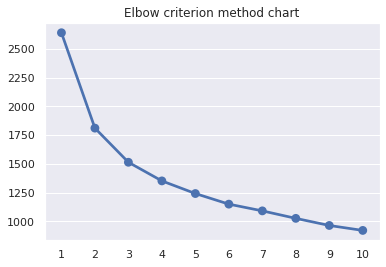

In [ ]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(wholesale_scaled_df)
    sse[k] = kmeans.inertia_
    
plt.title('Elbow criterion method chart')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The "elbow" is somewhere around 2 or 3 clusters, which means you should start cluster with +1 number of clusters i.e. with 3 or 4.

# **Analyze average K-means segmentation attributes**

* KMeans รันแล้วบางทีจัดกลุ่มสลับ แต่ผลเหมือนเดิม

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
segment                                                                 
0       26,312.0  5,489.0  5,228.0 8,342.0             830.0     3,212.0
1       10,229.0  1,891.0  2,500.0 2,403.0             449.0       741.0
2        3,618.0  6,645.0 11,296.0   703.0           4,675.0       576.0
3       10,453.0 12,717.0 17,723.0 1,940.0           7,684.0     2,394.0

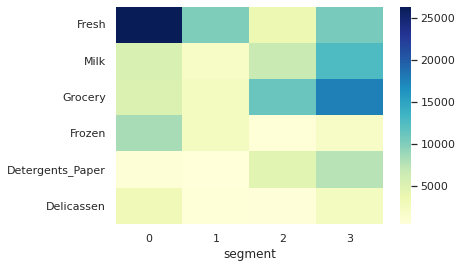

Fresh     Milk  Grocery  Frozen  Detergents_Paper  Delicassen
segment                                                                 
0        6,714.0 10,356.0 15,939.0 1,319.0           7,092.0     1,424.0
1        9,735.0  2,017.0  2,613.0 2,341.0             490.0       726.0
2       25,528.0  6,406.0  6,272.0 7,513.0           1,091.0     3,401.0

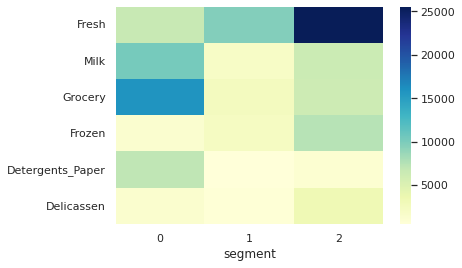

In [34]:
kmeans4_averages = wholesale_kmeans4.groupby(['segment']).mean().round(0)
display(kmeans4_averages)

sns.heatmap(kmeans4_averages.T, cmap='YlGnBu')
plt.show()

kmeans = KMeans(n_clusters=3)
kmeans.fit(wholesale_scaled_df)
wholesale_kmeans3 = wholesale.assign(segment=kmeans.labels_)

kmeans3_averages = wholesale_kmeans3.groupby(['segment']).mean().round(0)
display(kmeans3_averages)

sns.heatmap(kmeans3_averages.T, cmap='YlGnBu')
plt.show()

* Segment 0 is Fresh and Frozen shopping
* Segment 1 is Fresh
* Segment 2 is Grocery
* Segment 3 is Grocery, milk, fresh, and detergents

# **Plot average NMF segmentation attributes**

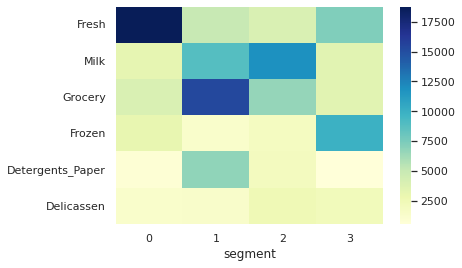

In [28]:
nmf4_averages = wholesale_nmf.groupby('segment').mean().round(0)
sns.heatmap(nmf4_averages.T, cmap='YlGnBu')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


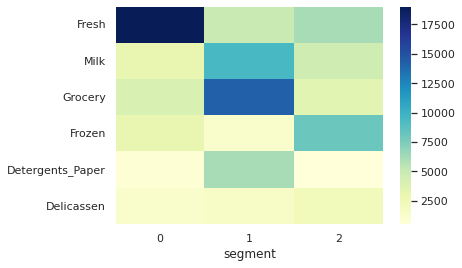

In [36]:
nmf = NMF(3)
nmf.fit(wholesale) # จำไว้ว่า NMF ใช้กับข้อมูลที่ไม่ต้อง transform ได้เลย
components = pd.DataFrame(nmf.components_, columns=wholesale.columns)

# Create the W matrix
W = pd.DataFrame(data=nmf.transform(wholesale), columns=components.index)
W.index = wholesale.index

# Assign the column name where the corresponding value is the largest
wholesale_nmf3 = wholesale.assign(segment=W.idxmax(axis=1))

# Calculate the average column values per each segment
nmf3_averages = wholesale_nmf3.groupby('segment').mean().round(0)

# Plot the average values as heatmap
sns.heatmap(nmf3_averages.T, cmap='YlGnBu')

# Display the chart
plt.show()